##### Propensity model - The model that tries to predict the customer who has an intention or likelihood to buy the specific product. 

##### Who Will Subscribe A Term Deposit? 

#### Bank Problem Statement:
Understand why clients are not depositing as frequently as before. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

#### Data Science Problem Statement:
Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

#### Understand the Kaggle dataset:
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010). 

In [20]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# load modeling libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Read Data

In [17]:
# accessing to the folder where the file is stored
path = 'train.csv'

# Load the dataframe
df = pd.read_csv(path, sep=';')

print('Shape of the data is: ',df.shape)

df.sample(10)

Shape of the data is:  (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28956,32,admin.,single,secondary,no,1,no,no,cellular,2,feb,75,1,208,1,failure,no
23986,34,technician,divorced,secondary,no,347,no,no,cellular,29,aug,15,14,-1,0,unknown,no
42046,30,management,married,tertiary,no,944,no,no,cellular,29,oct,251,2,-1,0,unknown,yes
27000,39,management,divorced,tertiary,no,1968,no,no,cellular,21,nov,648,1,-1,0,unknown,yes
3834,24,technician,single,secondary,no,3926,yes,no,unknown,16,may,320,2,-1,0,unknown,no
35476,27,student,single,secondary,no,8366,no,no,cellular,7,may,458,2,349,1,other,no
8888,29,admin.,divorced,secondary,yes,-489,yes,no,unknown,4,jun,249,2,-1,0,unknown,no
35583,24,technician,single,secondary,no,-540,yes,no,cellular,7,may,190,2,-1,0,unknown,no
22634,45,technician,single,secondary,no,11,no,no,cellular,22,aug,247,1,-1,0,unknown,no
18313,40,admin.,single,secondary,no,816,no,no,cellular,31,jul,114,8,-1,0,unknown,no


# Data Understanding and exploration

In [ ]:
df.describe()

In [ ]:
fig = plt.figure(figsize = (3,3))
sns.histplot(df.y)

# Understand data with business perspective

What are the most responsible features of the people who respond to the campaign and register for deposits?

lets a dig a data more to understand it.

In [3]:
df["balance"].max(), df["balance"].min()

(102127, -8019)

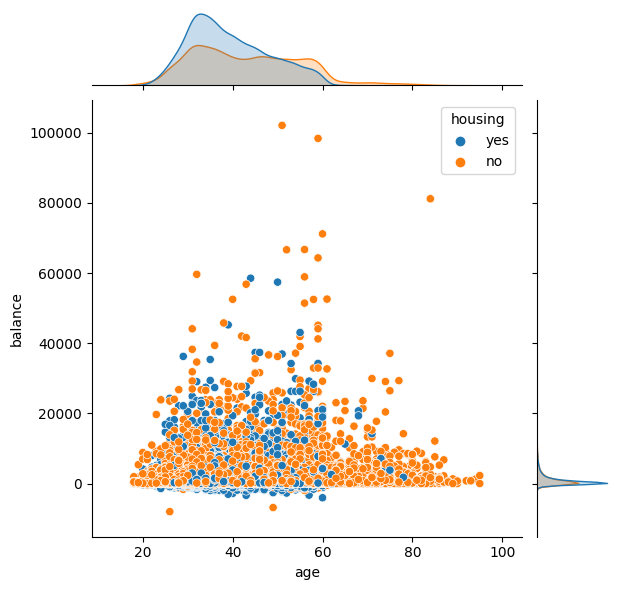

In [4]:
sns.jointplot(x = "age", y = "balance",
             hue = "housing",
             data = df)

Most individuals do not have a loan on their homes, but most of the individuals who have a loan on their homes are concentrated between the ages of 25 to 60 years, and this age group is the main target, so we may face some problems in choosing the characteristics that distinguish the target people.

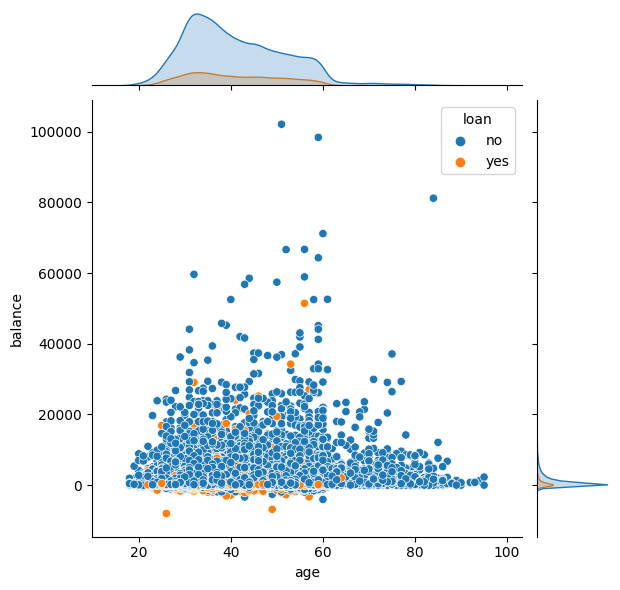

In [5]:
sns.jointplot(x = "age", y = "balance",
             hue = "loan",
             data = df)

Loan feature does not affect the results directly.

Similarly you can dig other variables individually or combination wise to get more clear idea about what are the people are more inclined to subscribe the term deposite.

Ous basic conlustion so far; 
- Their ages range from 22 years old to 70 years old.
- personal loan, this is not effective.

# Data Cleaning and processing

In [6]:
# check missing values
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Checking duplicate values
print(df.duplicated().value_counts())

False    45211
dtype: int64


In [8]:
# Replace method: Mode value
# Replace method for "unknown" variable in ["job", "education", "contact"].
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)

In [9]:
# remove irrelevant columns
data = df.drop(['month','day'],axis=1)

In [10]:
# label encoding
le = LabelEncoder()
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['y'] = le.fit_transform(data['y'])

In [11]:
# standardize features
features = data.drop("y", axis = 1)
target = data["y"]
features_num = features.columns
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features))
features.columns = features_num

features.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.085217,-0.275762,1.314507,-0.13549,0.256419,0.893915,-0.436803,-0.262091,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.458223,1.368372,-0.218740,-0.13549,-0.437895,0.893915,-0.436803,-0.262091,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.702593,-0.275762,-0.218740,-0.13549,-0.446762,0.893915,2.289359,-0.262091,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.011281,-0.275762,-0.218740,-0.13549,0.047205,0.893915,-0.436803,-0.262091,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,-1.011281,1.368372,-0.218740,-0.13549,-0.447091,-1.118674,-0.436803,-0.262091,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [12]:
# export clean and processed data
final_data = pd.concat([features, target], axis=1,)
final_data.to_csv("final_version.csv")

# Train test split

In [34]:
# Training, Test, & Split
y = final_data["y"]
X = final_data.drop("y",axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

# Build baseline model

In [35]:
# Random forest Model 1: Baseline
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [36]:
# Evaluate model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11605  1022]
 [  372   565]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11977
           1       0.60      0.36      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564

Accuracy: 0.8972279563550575


# Feature Importance

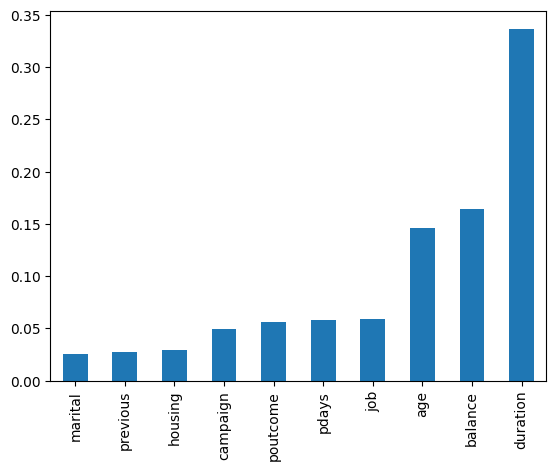

<Figure size 500x500 with 0 Axes>

In [23]:
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
fig = plt.figure(figsize = (5,5))
plt.show()

In [24]:
imp_features = list(rfc_importances.index)
imp_features

['marital',
 'previous',
 'housing',
 'campaign',
 'poutcome',
 'pdays',
 'job',
 'age',
 'balance',
 'duration']

In [28]:
# data with importance feactures
X_top = final_data[imp_features]

# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X_top,y, test_size=0.3, random_state=42, stratify=y)

In [29]:
# Random forest Model 2: with top features
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
# Evaluate model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11955  1598]
 [   11     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.00      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

Accuracy: 0.8813771748746683


The Feature Selection techniques can differ from problem to problem. In those cases, feel free to try out other methods like PCA, SelectKBest(), SelectPercentile(), tSNE etc.

In our case random forest top featurs have not helped us, so we can ignore this part for further model tasks

# Hyper parametertuning

In [38]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']}
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8}


### Best Parameters are: {'criterion': 'gini', 'max_depth': 8}

# Fianl Model

In [37]:
# # Random forest Model 2: hyperparameter tuning
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 8)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
# Evaluate model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11857  1262]
 [  120   325]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.73      0.20      0.32      1587

    accuracy                           0.90     13564
   macro avg       0.82      0.60      0.63     13564
weighted avg       0.88      0.90      0.87     13564

Accuracy: 0.8981126511353583
